# 2D toy example
The 2D example used in Mazumdar et al. 2019 "On Finding Local Nash Equilibria (and Only Local Nash Equilibria) in Zero-Sum Games".


$$f(x, y) = e^{- 0.01 (x^2 + y^2)} ((0.3x^2 + y)^2 + (0.5y^2 + x)^2)$$

In [92]:
import matplotlib

matplotlib.rc('font', size=18)

import matplotlib.pyplot as plt
import jax
import jax.numpy as np
from toy.optim import run_optimizer

In [2]:
def hessian(f):
    return jax.jacfwd(jax.jacrev(f))

In [3]:
class ToyFunction:
    @staticmethod
    def __call__(x, y):
        return - np.exp(-0.01 * (x**2 + y**2)) * ((0.3 * x**2 + y) ** 2 + (0.5 * y**2 + x) ** 2)

    @staticmethod
    def nash():
        return np.array([
            [-12.4766, -8.67793],
            [-11.4267, 8.0043],
            [12.395, -6.37283]
        ])

    @staticmethod
    def spurious_fixed_pts():
        return np.array([[-1.31653, -1.22427]])
 
f = ToyFunction()

In [4]:
def get_gda_step(func, x, y, lrx, lry):
    gx = jax.grad(func, argnums=0)(x, y)
    gy = jax.grad(func, argnums=1)(x, y)
    return lrx * gx, - lry * gy

def get_ftr_step(func, x, y, lrx, lry):
    gx = jax.grad(func, argnums=0)(x, y)
    gy = jax.grad(func, argnums=1)(x, y)
    
    hess = hessian(lambda z: func(*z))(np.array([x, y]))

    hxx = hess[0, 0]
    hxy = hess[0, 1]
    hyx = hess[1, 0]
    hyy = hess[1, 1]

    eps = 0.0001
    dx = lrx * gx  + lry * (hxx / (hxx * hxx + eps)) * hxy * gy
    dy = - lry * gy - lrx * (hyy / (hyy * hyy + eps)) * hyx * gx

    return dx, dy

In [64]:
def get_lss_step(func, x, y, lrx, lry):
    gx = jax.grad(func, argnums=0)(x, y)
    gy = jax.grad(func, argnums=1)(x, y)
    
    jac = np.array([[1., 0.], [0., -1.]]) @ hessian(lambda z: func(*z))(np.array([x, y]))
    
    
    eps = 0.0001
    wz = np.stack([gx, -gy])     # w(z)
    second_term = jac.T @ np.linalg.inv(jac.T @ jac + eps * np.eye(len(jac))) @ jac.T @ wz

    hz = 0.5 * wz + 0.5 * second_term
    
    dx = lrx * hz[0]
    dy = lry * hz[1]
    
    return dx, dy

In [65]:
toy_f = lambda x, y: - np.exp(-0.01 * (x**2 + y**2)) * ((0.3 * x**2 + y) ** 2 + (0.5 * y**2 + x) ** 2)
f_gda_step = jax.jit(lambda x, y, lrx, lry: get_gda_step(toy_f, x, y, lrx, lry))
f_ftr_step = jax.jit(lambda x, y, lrx, lry: get_ftr_step(toy_f, x, y, lrx, lry))
f_lss_step = jax.jit(lambda x, y, lrx, lry: get_lss_step(toy_f, x, y, lrx, lry))

In [66]:
f_gda_step(-5., -9., 0.001, 0.001)
f_ftr_step(-5., -9., 0.001, 0.001)
f_lss_step(-5., -9., 0.001, 0.001)

traj_gda_all = []
traj_ftr_all = []
traj_lss_all = []

In [67]:
init_x, init_y = -4.9, -9.1
n_itr = 2000
lr_x = 0.001
lr_y = 0.001

traj_gda_all.append(run_optimizer(f, init_x, init_y, lr_x, lr_y, n_itr, f_gda_step))
traj_ftr_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_ftr_step))
traj_lss_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_lss_step))

In [68]:
init_x, init_y = -14., -3.
n_itr = 20000
lr_x = 0.001
lr_y = 0.001
traj_gda_all.append(run_optimizer(f, init_x, init_y, lr_x, lr_y, n_itr, f_gda_step))
traj_ftr_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_ftr_step))
traj_lss_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_lss_step))

In [69]:
init_x, init_y = -10., 3.
n_itr = 10000
lr_x = 0.01
lr_y = 0.01
traj_gda_all.append(run_optimizer(f, init_x, init_y, lr_x, lr_y, n_itr, f_gda_step))
traj_ftr_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_ftr_step))
traj_lss_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_lss_step))


In [70]:
init_x, init_y = 7.9, 4.3
n_itr = 5000
lr_x = 0.001
lr_y = 0.001
traj_gda_all.append(run_optimizer(f, init_x, init_y, lr_x, lr_y, n_itr, f_gda_step))
traj_ftr_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_ftr_step))
traj_lss_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_lss_step))


In [71]:
init_x, init_y = 12., -9.
n_itr = 10000
lr_x = 0.0005
lr_y = 0.0005
traj_gda_all.append(run_optimizer(f, init_x, init_y, lr_x, lr_y, n_itr, f_gda_step))
traj_ftr_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_ftr_step))
traj_lss_all.append(run_optimizer(toy_f, init_x, init_y, lr_x, lr_y, n_itr, f_lss_step))

In [94]:
def plot_contour(func, xlim=(-20., 20.), ylim=(-20., 20.), figsize_y=8., show_legend=True, fontsize=22):
    if xlim is None:
        xlim = (-20, 20)
    if ylim is None:
        ylim = (-20, 20)

    xs = np.linspace(*xlim, 100)
    ys = np.linspace(*ylim, 100)
    xmesh, ymesh = np.meshgrid(xs, ys)
    fmesh = func(xmesh, ymesh)
    ratio_xy = (xlim[1] - xlim[0]) / (ylim[1] - ylim[0])
    plt.figure(figsize=(ratio_xy * figsize_y, figsize_y))
    plt.set_cmap('coolwarm')
    plt.contourf(xmesh, ymesh, -fmesh, 20, alpha=0.5)

    nash = func.nash()
    spurious_fixed_pts = func.spurious_fixed_pts()
    if len(nash) > 0:
        plt.scatter(nash[:, 0], nash[:, 1], marker='x', label='Local Nash eq.', color='k', s=150, linewidth=3.5)
    if len(spurious_fixed_pts) > 0:
        plt.scatter(spurious_fixed_pts[:, 0], spurious_fixed_pts[:, 1], marker='*', label='Non-Nash LASE', color='k', s=250)
    if show_legend:
        plt.legend()
    plt.xlabel('x', fontdict={'size': fontsize})
    plt.ylabel('y', fontdict={'size': fontsize})
    plt.xlim(*xlim)
    plt.ylim(*ylim)


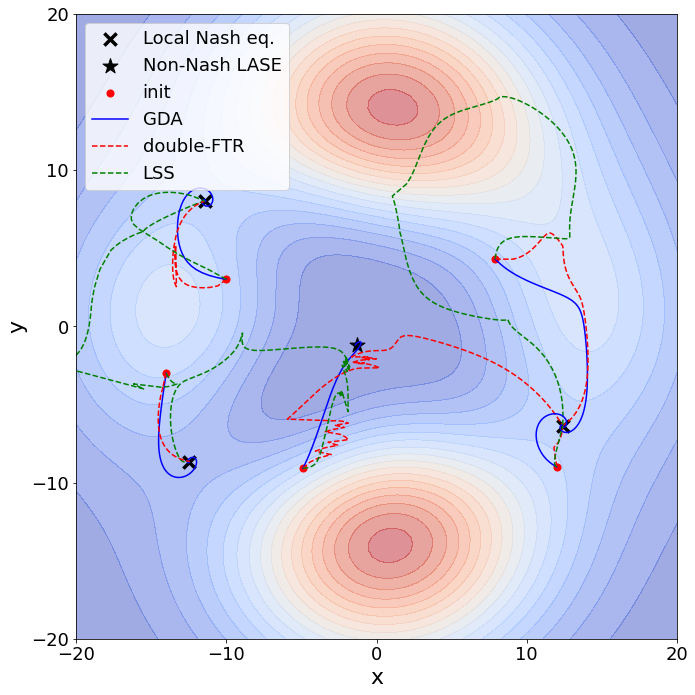

In [95]:
plot_contour(f, figsize_y=10.)
plt.scatter(traj_ftr_all[0][0, 0], traj_ftr_all[0][0, 1], color='r', marker='.', s=200, label='init')
plt.plot(traj_gda_all[0][:, 0], traj_gda_all[0][:, 1], color='b', label='GDA')
plt.plot(traj_ftr_all[0][:, 0], traj_ftr_all[0][:, 1], color='r', label='double-FTR', linestyle='--')
plt.plot(traj_lss_all[0][:, 0], traj_lss_all[0][:, 1], color='g', label='LSS', linestyle='--')
for traj_i in range(1, len(traj_gda_all)):
    plt.plot(traj_gda_all[traj_i][:, 0], traj_gda_all[traj_i][:, 1], color='b')
    plt.plot(traj_ftr_all[traj_i][:, 0], traj_ftr_all[traj_i][:, 1], color='r', linestyle='--')
    plt.plot(traj_lss_all[traj_i][:, 0], traj_lss_all[traj_i][:, 1], color='g', linestyle='--')
    plt.scatter(traj_ftr_all[traj_i][0, 0], traj_ftr_all[traj_i][0, 1], color='r', marker='.', s=200)

plt.locator_params(axis="x", nbins=4)
plt.locator_params(axis="y", nbins=4)

plt.legend()

plt.tight_layout()
plt.savefig('../plots/toy-2d.pdf')


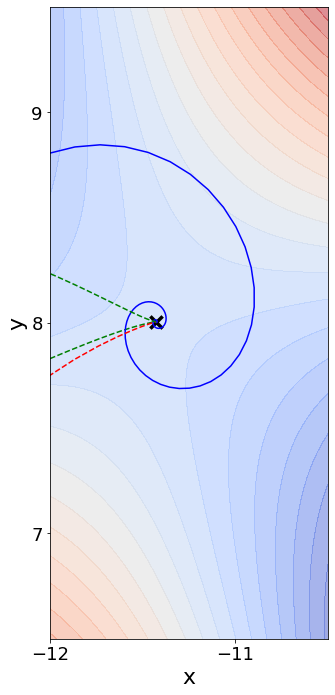

In [97]:
plot_contour(f, xlim=(-12, -10.5), ylim=(6.5, 9.5), figsize_y=10., show_legend=False)
plt.scatter(traj_ftr_all[0][0, 0], traj_ftr_all[0][0, 1], color='r', marker='.', s=200, label='init')
plt.plot(traj_gda_all[0][:, 0], traj_gda_all[0][:, 1], color='b', label='GDA')
plt.plot(traj_ftr_all[0][:, 0], traj_ftr_all[0][:, 1], color='r', label='double-FTR', linestyle='--')
plt.plot(traj_lss_all[0][:, 0], traj_lss_all[0][:, 1], color='g', label='LSS', linestyle='--')
for traj_i in range(1, len(traj_gda_all)):
    plt.plot(traj_gda_all[traj_i][:, 0], traj_gda_all[traj_i][:, 1], color='b')
    plt.plot(traj_ftr_all[traj_i][:, 0], traj_ftr_all[traj_i][:, 1], color='r', linestyle='--')
    plt.plot(traj_lss_all[traj_i][:, 0], traj_lss_all[traj_i][:, 1], color='g', linestyle='--')
    plt.scatter(traj_ftr_all[traj_i][0, 0], traj_ftr_all[traj_i][0, 1], color='r', marker='.', s=200)
plt.locator_params(axis="x", nbins=2)
plt.locator_params(axis="y", nbins=4)
plt.tight_layout()
plt.savefig('../plots/toy-2d-sw.pdf')

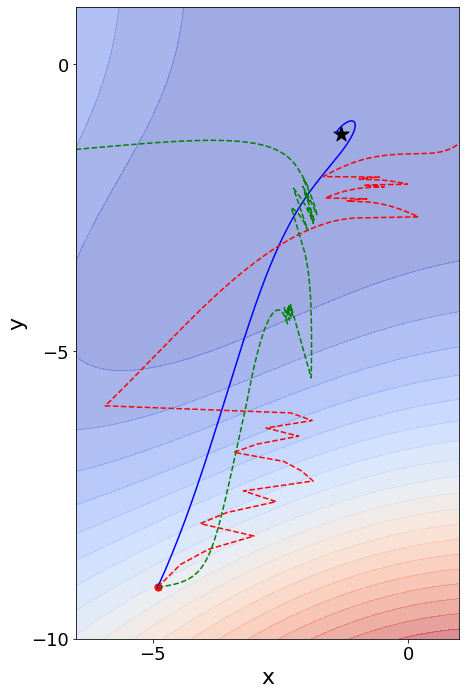

In [98]:
plot_contour(f, xlim=(-6.5, 1.), ylim=(-10, 1.), figsize_y=10., show_legend=False)
plt.scatter(traj_ftr_all[0][0, 0], traj_ftr_all[0][0, 1], color='r', marker='.', s=200, label='init')
plt.plot(traj_gda_all[0][:, 0], traj_gda_all[0][:, 1], color='b', label='GDA')
plt.plot(traj_ftr_all[0][:, 0], traj_ftr_all[0][:, 1], color='r', label='double-FTR', linestyle='--')
plt.plot(traj_lss_all[0][:, 0], traj_lss_all[0][:, 1], color='g', label='LSS', linestyle='--')
for traj_i in range(1, len(traj_gda_all)):
    plt.plot(traj_gda_all[traj_i][:, 0], traj_gda_all[traj_i][:, 1], color='b')
    plt.plot(traj_ftr_all[traj_i][:, 0], traj_ftr_all[traj_i][:, 1], color='r', linestyle='--')
    plt.plot(traj_lss_all[traj_i][:, 0], traj_lss_all[traj_i][:, 1], color='g', linestyle='--')
    plt.scatter(traj_gda_all[traj_i][0, 0], traj_gda_all[traj_i][0, 1], color='b', marker='.', s=200)
    plt.scatter(traj_ftr_all[traj_i][0, 0], traj_ftr_all[traj_i][0, 1], color='r', marker='.', s=200)
plt.locator_params(axis="x", nbins=2)
plt.locator_params(axis="y", nbins=4)
plt.tight_layout()
plt.savefig('../plots/toy-2d-mid.pdf')

In [16]:
class ToyLimitCycle:
    @staticmethod
    def __call__(x, y):
        return x * y + 0.0001 * (x ** 2 - y ** 4)

    @staticmethod
    def nash():
        return np.array([
            [0., 0.]
        ])

    @staticmethod
    def spurious_fixed_pts():
        return np.array([])
 
f_lc = ToyLimitCycle()
f_lc_gda_step = jax.jit(lambda x, y, lrx, lry: get_gda_step(f_lc.__call__, x, y, lrx, lry))
f_lc_ftr_step = jax.jit(lambda x, y, lrx, lry: get_ftr_step(f_lc.__call__, x, y, lrx, lry))

In [17]:
traj_gda_all_lc = []
traj_ftr_all_lc = []
inits = []

init_x, init_y = -7., -5.
inits.append((init_x, init_y))


n_itr = 100000
lr_x = 0.01
lr_y = 0.01


traj_gda_all_lc.append(run_optimizer(f_lc, init_x, init_y, lr_x, lr_y, n_itr, f_lc_gda_step))
traj_ftr_all_lc.append(run_optimizer(f_lc, init_x, init_y, lr_x, lr_y, n_itr, f_lc_ftr_step))


init_x, init_y = 2. , -2.
inits.append((init_x, init_y))

n_itr = 100000
lr_x = 0.01
lr_y = 0.01


traj_gda_all_lc.append(run_optimizer(f_lc, init_x, init_y, lr_x, lr_y, n_itr, f_lc_gda_step))
traj_ftr_all_lc.append(run_optimizer(f_lc, init_x, init_y, lr_x, lr_y, n_itr, f_lc_ftr_step))


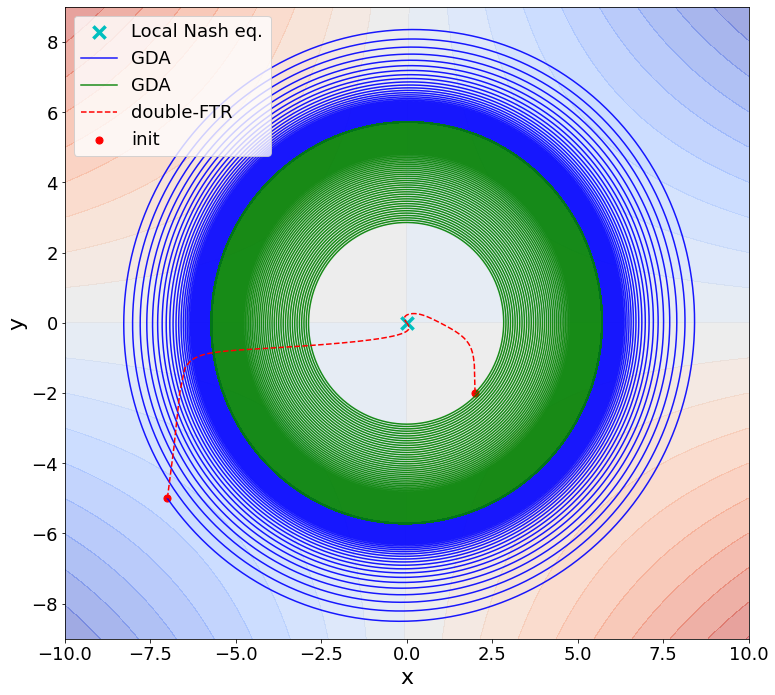

In [18]:
matplotlib.rc('font', size=18)

plot_contour(f_lc, xlim=(-10, 10), ylim=(-9, 9), figsize_y=10., show_legend=False)

plt.plot(traj_gda_all_lc[0][:, 0], traj_gda_all_lc[0][:, 1], color='b', label='GDA', alpha=0.9)
plt.plot(traj_gda_all_lc[1][:, 0], traj_gda_all_lc[1][:, 1], color='g', label='GDA', alpha=0.9)
plt.plot(traj_ftr_all_lc[0][:, 0], traj_ftr_all_lc[0][:, 1], color='r', label='double-FTR', linestyle='--')
plt.plot(traj_ftr_all_lc[1][:, 0], traj_ftr_all_lc[1][:, 1], color='r', linestyle='--')

plt.scatter(traj_ftr_all_lc[0][0, 0], traj_ftr_all_lc[0][0, 1], color='r', marker='.', s=200, label='init')
plt.scatter(traj_ftr_all_lc[1][0, 0], traj_ftr_all_lc[1][0, 1], color='r', marker='.', s=200)

plt.legend()
plt.tight_layout()
plt.savefig('../plots/toy-limit-cycle.pdf')

In [19]:
class ToySpurious:
    @staticmethod
    def __call__(x, y):
        return 2 * x**2 + 5 * x * y + 1 * y**2

    @staticmethod
    def nash():
        return np.array([
        ])

    @staticmethod
    def spurious_fixed_pts():
        return np.array([
            [0., 0.]
        ])
 
f_sp = ToySpurious()
f_sp_gda_step = jax.jit(lambda x, y, lrx, lry: get_gda_step(f_sp.__call__, x, y, lrx, lry))
f_sp_ftr_step = jax.jit(lambda x, y, lrx, lry: get_ftr_step(f_sp.__call__, x, y, lrx, lry))

In [20]:
traj_gda_all_sp = []
traj_ftr_all_sp = []
inits = []

init_x, init_y = -6., -3.
inits.append((init_x, init_y))


n_itr = 2000
lr_x = 0.01
lr_y = 0.01


traj_gda_all_sp.append(run_optimizer(f_sp, init_x, init_y, lr_x, lr_y, n_itr, f_sp_gda_step))
traj_ftr_all_sp.append(run_optimizer(f_sp, init_x, init_y, lr_x, lr_y, n_itr, f_sp_ftr_step))


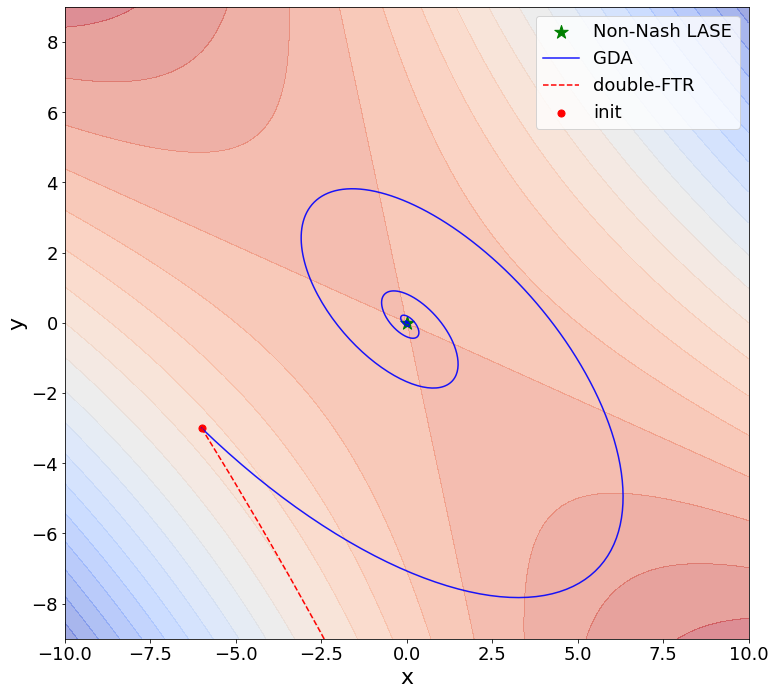

In [21]:
matplotlib.rc('font', size=18)

plot_contour(f_sp, xlim=(-10, 10), ylim=(-9, 9), figsize_y=10., show_legend=False)

plt.plot(traj_gda_all_sp[0][:, 0], traj_gda_all_sp[0][:, 1], color='b', label='GDA', alpha=0.9)
plt.plot(traj_ftr_all_sp[0][:, 0], traj_ftr_all_sp[0][:, 1], color='r', label='double-FTR', linestyle='--')

plt.scatter(traj_ftr_all_sp[0][0, 0], traj_ftr_all_sp[0][0, 1], color='r', marker='.', s=200, label='init')

plt.legend()
plt.tight_layout()
plt.savefig('../plots/toy-spurious.pdf')
